In [81]:
import pandas as pd

In [82]:
xls = pd.ExcelFile('../data.xlsx')

xls.sheet_names 

In [84]:
df = {}
for num in xls.sheet_names[1:-1]:
    df[num] = pd.read_excel(xls, num) 
    print(df[num].shape)

(2076, 10)
(2028, 10)
(2188, 10)
(2186, 10)
(2184, 10)
(2085, 10)
(2185, 10)
(2185, 10)
(2080, 10)
(2182, 10)
(2054, 10)
(2112, 10)
(2087, 10)
(2083, 10)
(2186, 10)
(2186, 10)
(2187, 10)
(2082, 10)
(2185, 10)
(2110, 10)
(2096, 10)
(2099, 10)
(2113, 10)
(2093, 10)
(2080, 10)
(2100, 10)
(2083, 10)
(2113, 10)
(2107, 10)
(2106, 10)
(2101, 10)
(2101, 10)
(2093, 10)
(1579, 10)
(2172, 10)
(2118, 10)
(2085, 10)
(2128, 10)
(2011, 10)


In [85]:
for key in df:
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction='both')
    df[key].drop_duplicates(inplace=True)

In [86]:
 df_radon = pd.DataFrame(index=df['50'].index)

In [87]:
for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

1
2
3
4
5
8
9
10
11
13
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
35
36
37
39
41
43
44
45
46
48
49
50


In [88]:
df_radon.drop('Radon_44', axis=1, inplace=True)

In [89]:
df_radon = df_radon.T

In [90]:
from dtaidistance import dtw
ds = dtw.distance_matrix_fast(df_radon.values, parallel = True)

In [91]:
ds

array([[   0.        ,  525.00811184,  724.76848822, ..., 2264.24117142,
         779.4531901 , 1223.33154132],
       [ 525.00811184,    0.        ,  907.52585512, ..., 1846.5986351 ,
        1302.84402549, 1033.5644553 ],
       [ 724.76848822,  907.52585512,    0.        , ..., 2527.01778099,
        1217.63361981, 1020.52465977],
       ...,
       [2264.24117142, 1846.5986351 , 2527.01778099, ...,    0.        ,
        3855.50810449, 1555.36872392],
       [ 779.4531901 , 1302.84402549, 1217.63361981, ..., 3855.50810449,
           0.        , 2485.86922104],
       [1223.33154132, 1033.5644553 , 1020.52465977, ..., 1555.36872392,
        2485.86922104,    0.        ]])

In [92]:
ds = pd.DataFrame(ds, index = df_radon.index, columns=df_radon.index)

In [93]:
max_ds = ds.max().max()
ds = (max_ds - ds)/max_ds

In [94]:
ds

Radon_1   Radon_2   Radon_3   Radon_4   Radon_5   Radon_8  \
Radon_1   1.000000  0.874594  0.826878  0.703233  0.576335  0.856435   
Radon_2   0.874594  1.000000  0.783224  0.751049  0.638611  0.756484   
Radon_3   0.826878  0.783224  1.000000  0.785213  0.491625  0.855233   
Radon_4   0.703233  0.751049  0.785213  1.000000  0.636240  0.639080   
Radon_5   0.576335  0.638611  0.491625  0.636240  1.000000  0.425795   
Radon_8   0.856435  0.756484  0.855233  0.639080  0.425795  1.000000   
Radon_9   0.477057  0.580328  0.421186  0.590527  0.650312  0.292538   
Radon_10  0.788249  0.664006  0.702505  0.476252  0.323755  0.887830   
Radon_11  0.792309  0.821741  0.807589  0.836455  0.646498  0.723258   
Radon_13  0.912270  0.864070  0.893675  0.753672  0.542419  0.867981   
Radon_15  0.855999  0.773466  0.853551  0.646589  0.460941  0.908291   
Radon_16  0.785120  0.660907  0.698119  0.472402  0.321121  0.879860   
Radon_17  0.836386  0.781126  0.906440  0.708397  0.460161  0.897740   
Radon_18  0.799594  0.680188  0.727099  0.495463  0.337737  0.909341   
Radon_19  0.853748  0.750551  0.836713  0.617854  0.419717  0.968387   
Radon_20  0.878097  0.842509  0.918808  0.759524  0.506942  0.883268   
Radon_21  0.874842  0.762128  0.699656  0.529723  0.480308  0.893345   
Radon_22  0.366404  0.441076  0.278473  0.458714  0.624531  0.185766   
Radon_23  0.938644  0.845367  0.882181  0.735036  0.547107  0.875626   
Radon_25  0.823846  0.713436  0.784525  0.553623  0.371644  0.944808   
Radon_26  0.770443  0.796850  0.804903  0.813057  0.616508  0.684376   
Radon_27  0.806472  0.809389  0.876827  0.862183  0.575160  0.735285   
Radon_28  0.851776  0.747651  0.774188  0.570163  0.425877  0.947723   
Radon_29  0.853690  0.772867  0.909859  0.741022  0.452462  0.906602   
Radon_30  0.833996  0.800379  0.928461  0.804237  0.538664  0.828373   
Radon_31  0.831302  0.704887  0.725102  0.519596  0.390283  0.922006   
Radon_32  0.891953  0.804854  0.895762  0.710677  0.487073  0.928062   
Radon_35  0.822070  0.707504  0.749417  0.527944  0.370338  0.930832   
Radon_36  0.870498  0.774974  0.778662  0.579774  0.461791  0.912218   
Radon_37  0.836524  0.734624  0.831273  0.598528  0.395753  0.960307   
Radon_39  0.793936  0.667937  0.703184  0.477212  0.330848  0.899343   
Radon_41  0.835067  0.737605  0.835497  0.601421  0.398771  0.949857   
Radon_43  0.880019  0.773117  0.848045  0.646313  0.456855  0.961451   
Radon_45  0.869428  0.836495  0.861721  0.771681  0.587464  0.826521   
Radon_46  0.811680  0.784437  0.934757  0.817983  0.501750  0.804526   
Radon_48  0.459152  0.558912  0.396384  0.550942  0.791503  0.227390   
Radon_49  0.813816  0.688796  0.709150  0.493588  0.364898  0.912119   
Radon_50  0.707789  0.753118  0.756232  0.834632  0.616854  0.639370   

           Radon_9  Radon_10  Radon_11  Radon_13  ...  Radon_36  Radon_37  \
Radon_1   0.477057  0.788249  0.792309  0.912270  ...  0.870498  0.836524   
Radon_2   0.580328  0.664006  0.821741  0.864070  ...  0.774974  0.734624   
Radon_3   0.421186  0.702505  0.807589  0.893675  ...  0.778662  0.831273   
Radon_4   0.590527  0.476252  0.836455  0.753672  ...  0.579774  0.598528   
Radon_5   0.650312  0.323755  0.646498  0.542419  ...  0.461791  0.395753   
Radon_8   0.292538  0.887830  0.723258  0.867981  ...  0.912218  0.960307   
Radon_9   1.000000  0.083343  0.580516  0.471909  ...  0.343186  0.226800   
Radon_10  0.083343  1.000000  0.532963  0.757026  ...  0.877526  0.882707   
Radon_11  0.580516  0.532963  1.000000  0.817948  ...  0.712448  0.678506   
Radon_13  0.471909  0.757026  0.817948  1.000000  ...  0.858076  0.850047   
Radon_15  0.330309  0.725884  0.748323  0.894075  ...  0.897421  0.901840   
Radon_16  0.079918  0.996147  0.528318  0.750640  ...  0.873949  0.872662   
Radon_17  0.374104  0.694522  0.785630  0.886274  ...  0.780950  0.847381   
Radon_18  0.109095  0.989334  0.559605  0.781215  ...  0.894144  0.914680   
Radon_19  0.262034  0.910962  0.702642  0.86629

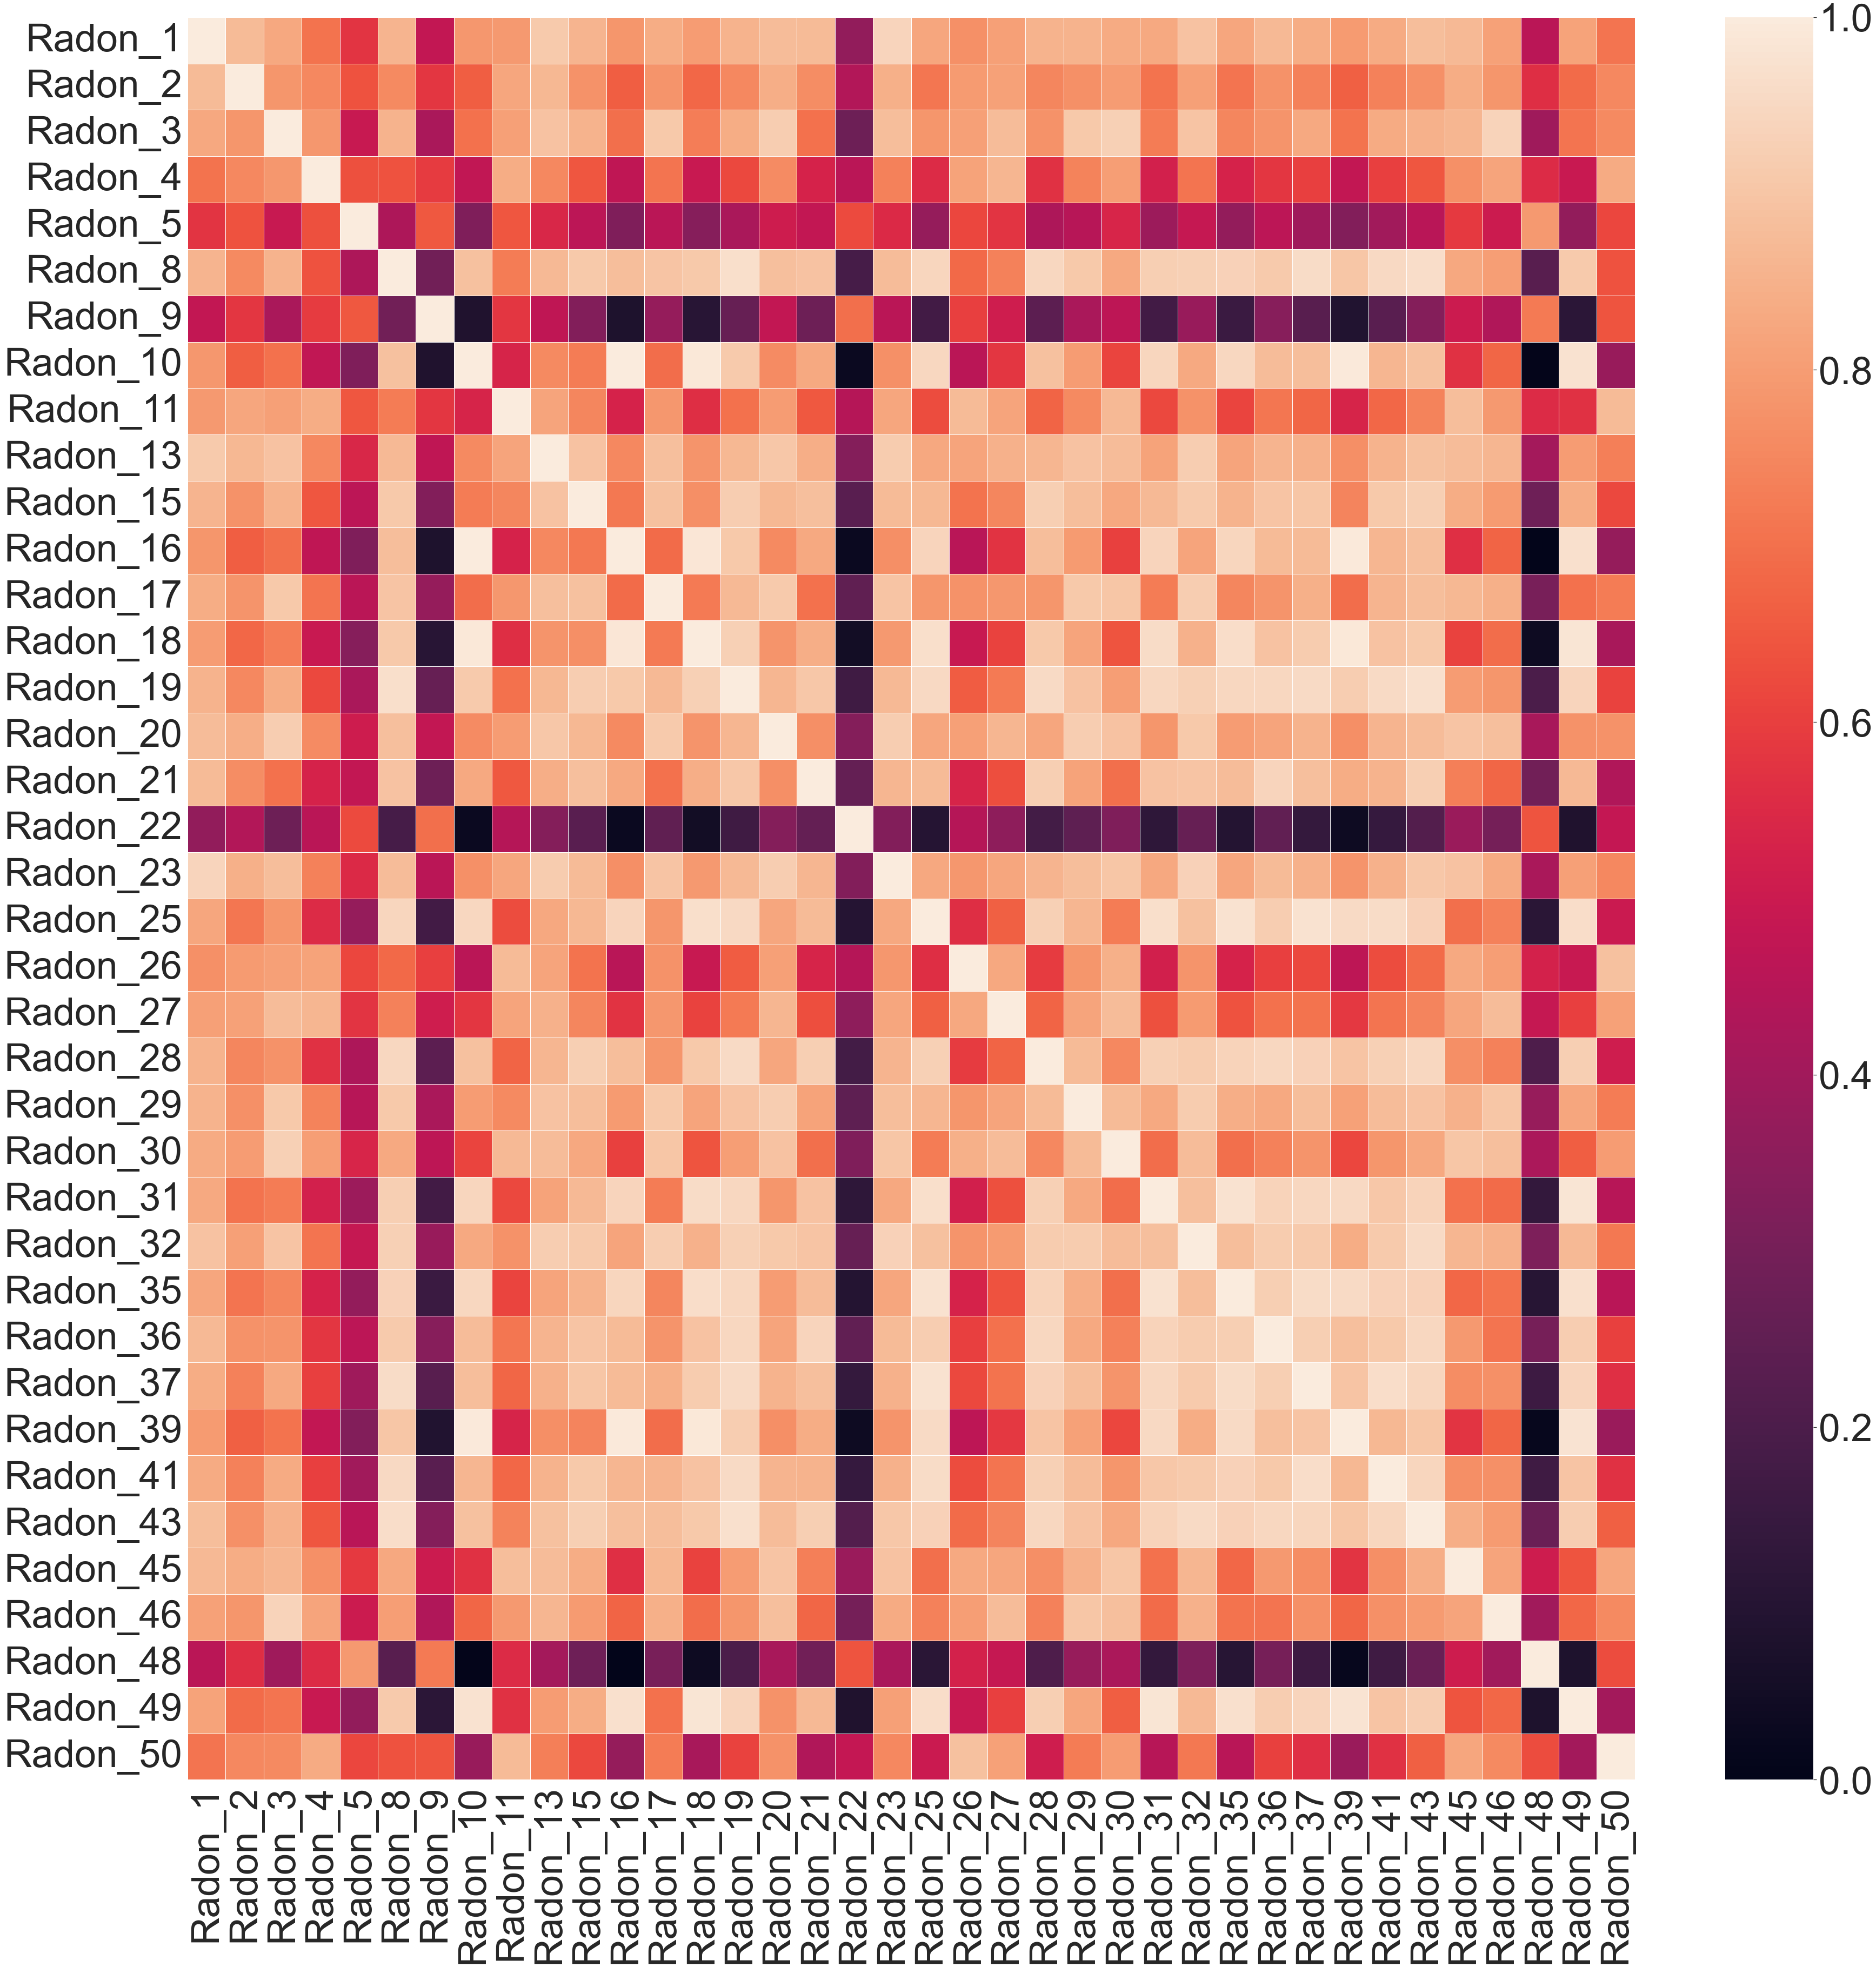

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(60,60)})
sns.set(font_scale=6.5)
sns.heatmap(ds, linewidths=.5, xticklabels=ds.index, yticklabels=ds.columns)
plt.xticks(rotation=90)
plt.savefig('heatmap.png', bbox_inches='tight')

In [96]:
A_adj_6 = ds > 0.8

In [97]:
for i in A_adj_6.columns:
    A_adj_6[i][i] = False
# for i in A_adj_7.columns:
#     A_adj_7[i][i] = False

In [115]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
g6 = nx.from_pandas_adjacency(A_adj_6)

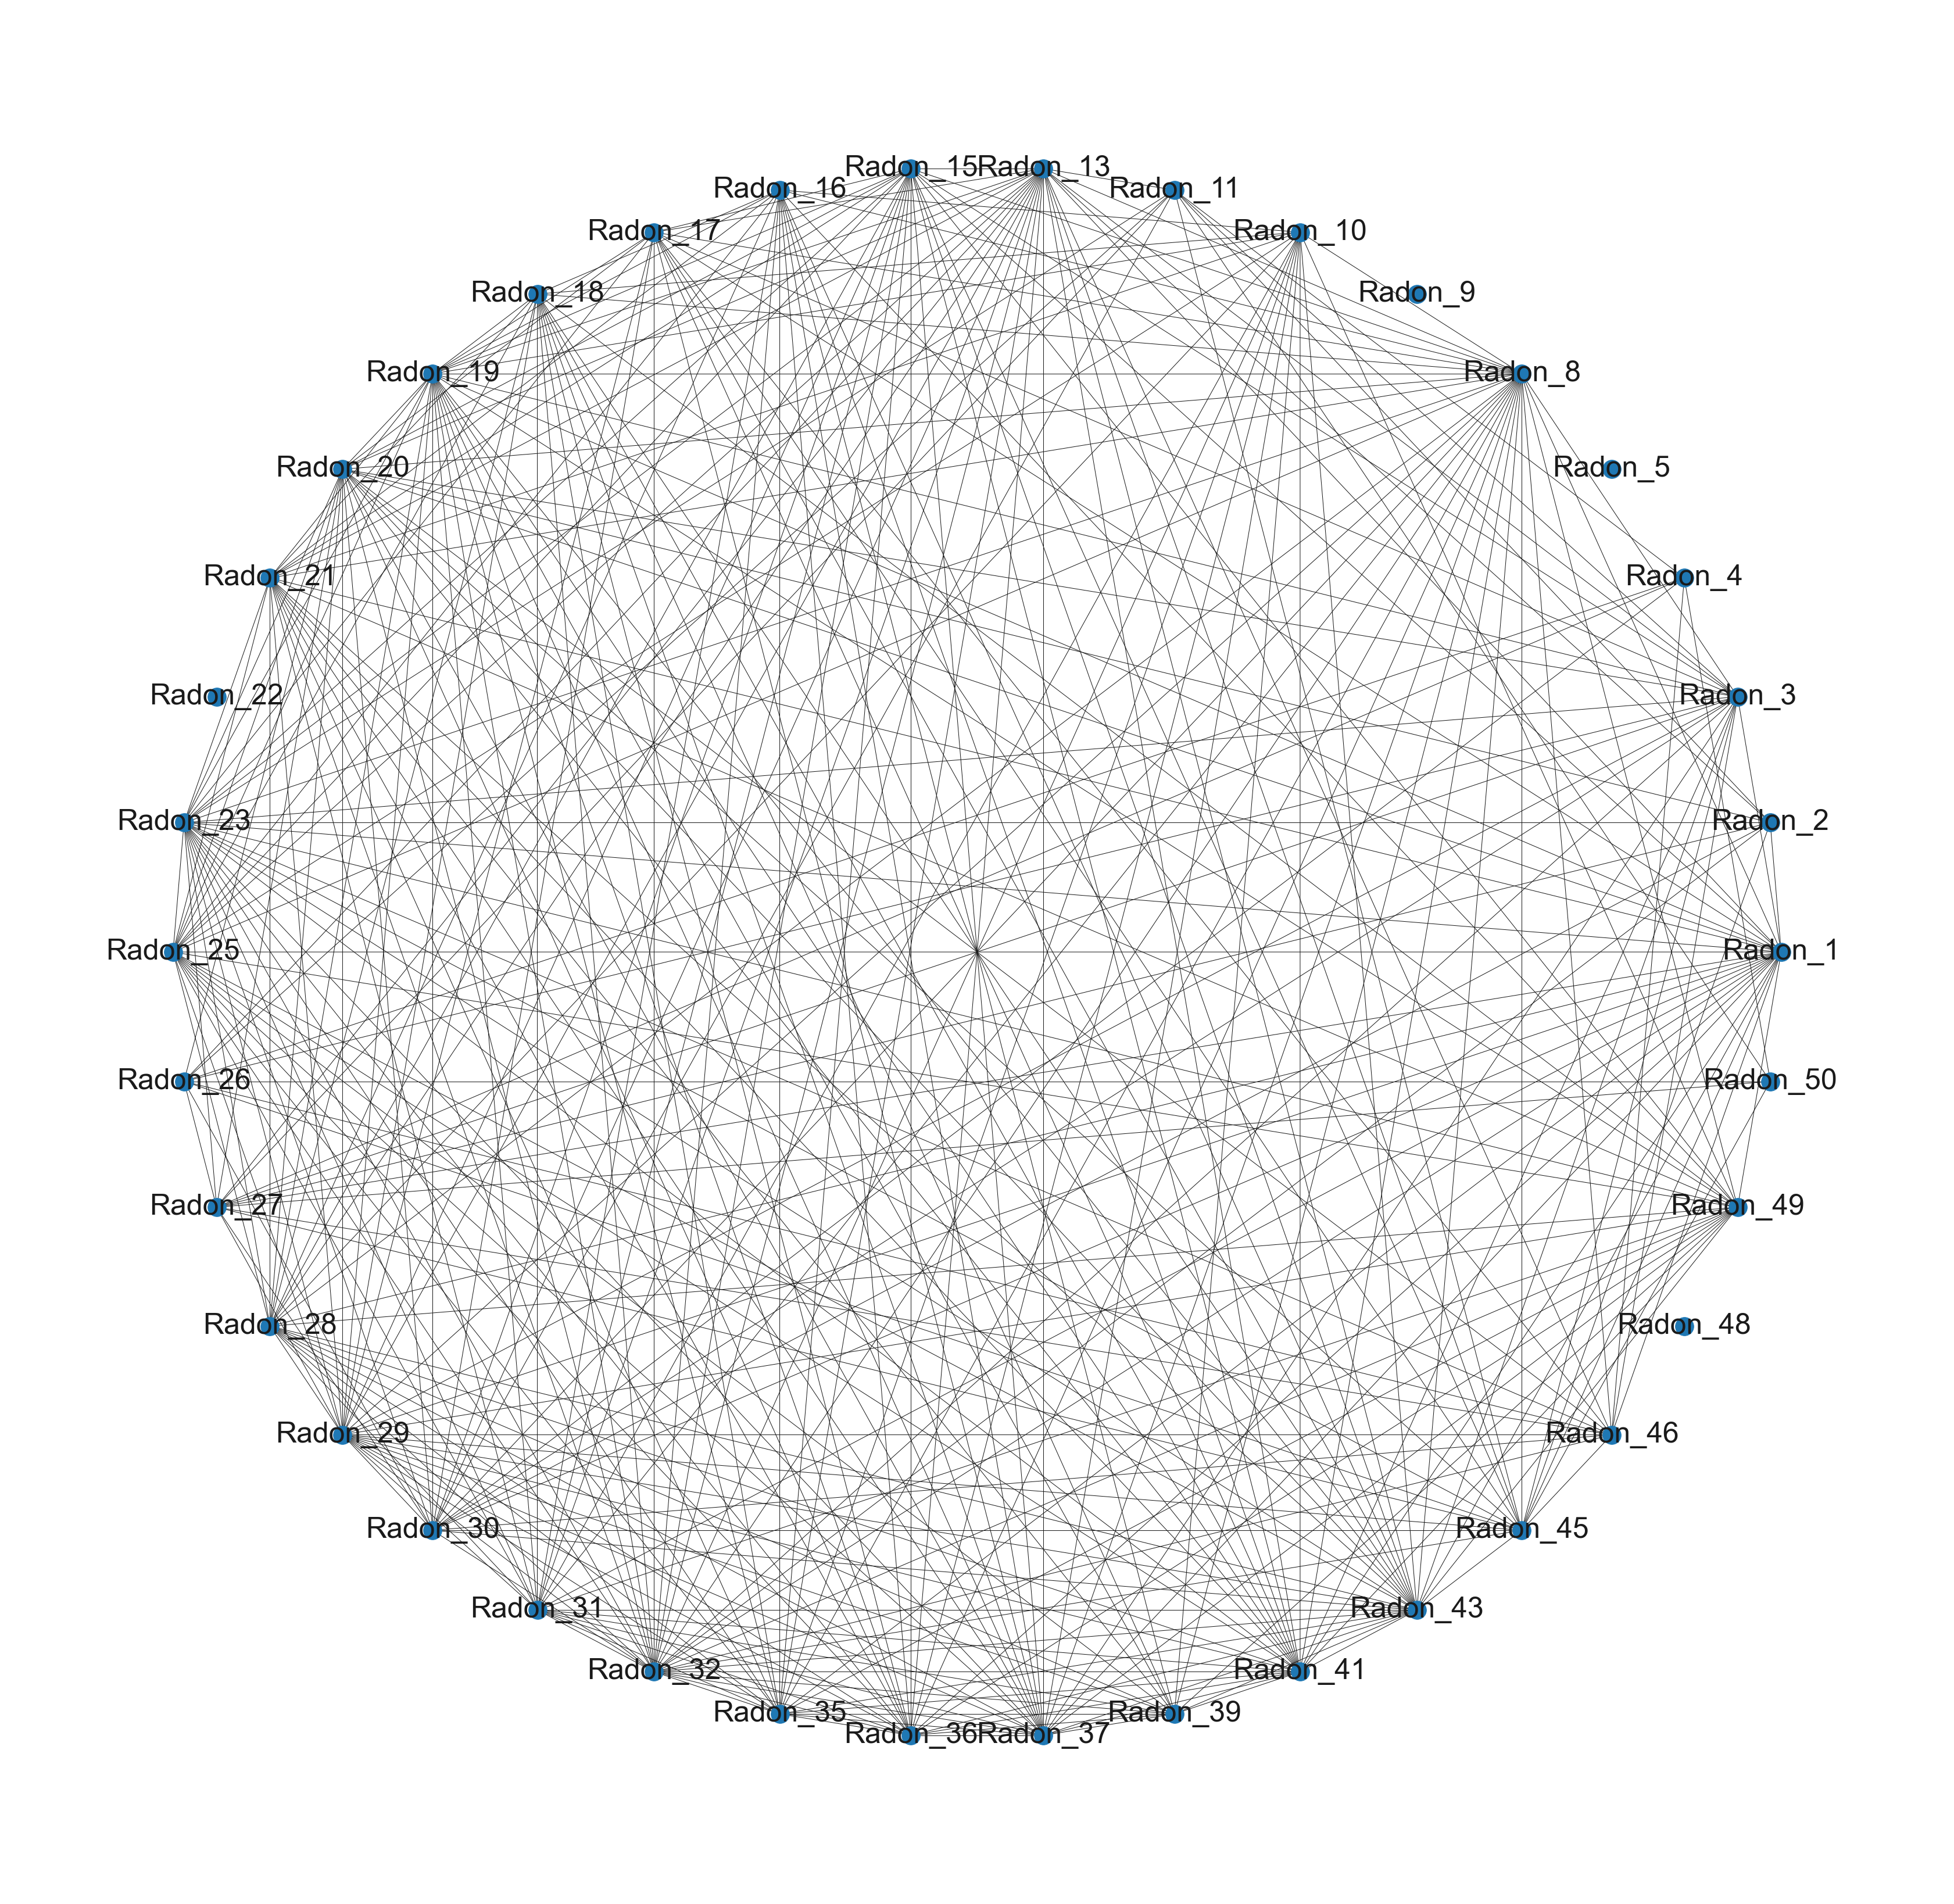

In [135]:
plt.rcParams = plt.rcParamsOrig
fig, ax2 = plt.subplots(1, 1, figsize=(60,60))
ax2.set_facecolor('white')
nx.draw_networkx(g6, font_size=50, node_size=1000, ax=ax2, width = 1, with_labels=True, pos=nx.circular_layout(g6))
fig.savefig('spatial_similarity_8', bbox_inches='tight')